In [7]:
import pandas as pd
import numpy as np
import librosa
import pydub
from pydub import AudioSegment
import matplotlib.pyplot as plt

This notebook aims to compare two library: librosa and pydub.

because i found use these two to read one same oog file, the scale of y scale is different.

I want to check and choose which library I really want to use

In [3]:
path='../../data/test/1000170626.ogg'

In [4]:
# librosa

y, sr =librosa.load(path,sr=None)

In [5]:
print(y)
print(y.shape)
print(len(y))

[-0.00486694 -0.00143428 -0.0066792  ...  0.0002828   0.00395225
 -0.00592587]
(7680000,)
7680000


In [6]:
print(sr) # represents 32KHz

32000


In [18]:
# pydub

audio = AudioSegment.from_ogg(path)

# audio duration
duration_seconds=len(audio)/1000.0


# Convert audio data to numpy array
y2 = np.array(audio.get_array_of_samples())

# sampling rate
sr2=audio.frame_rate

print(audio)
print(type(audio))
print(len(audio))

print(audio.channels)
print(sr2)

print(y2)
print(len(y2))

print(duration_seconds)
print(duration_seconds/60)

<class 'pydub.audio_segment.AudioSegment'>
240000
1
32000
[-10451677  -3080098 -14343464 ...    607314   8487402 -12725719]
7680000
240.0
4.0


Text(0, 0.5, 'Amplitude')

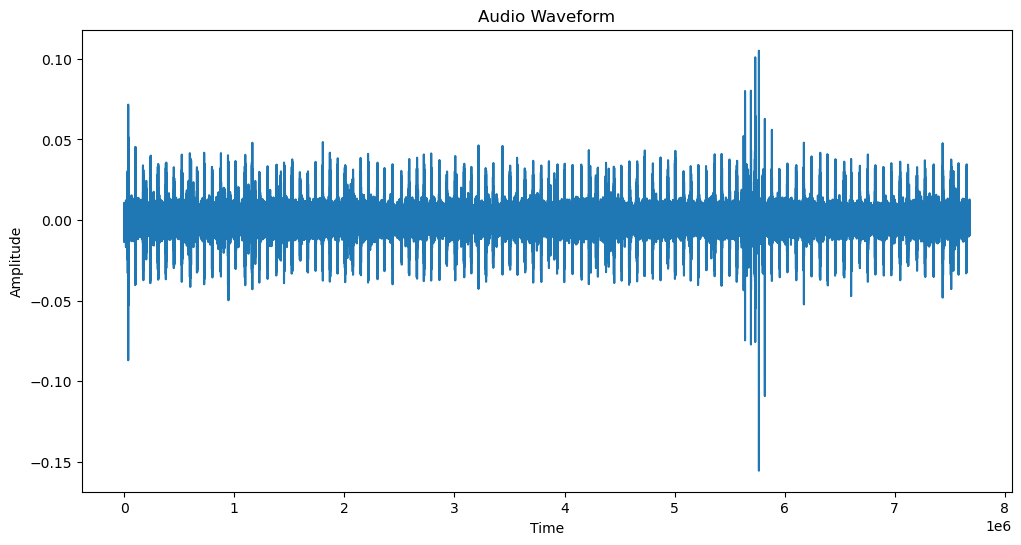

In [13]:
# compare these two difference through visualizing

## librosa

plt.figure(figsize=(12, 6))
plt.plot(y)
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

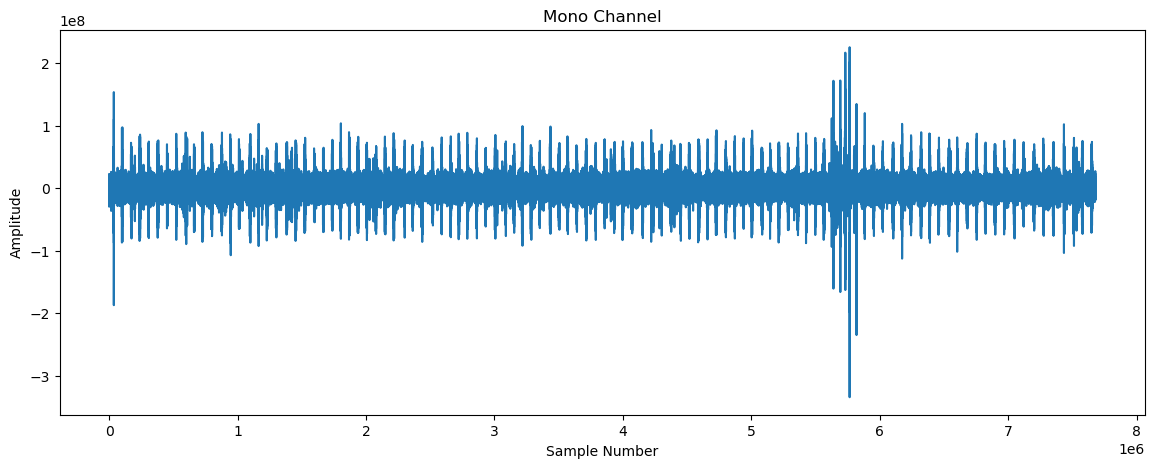

In [15]:
## pydub

# Determine the data processing method based on the number of audio channels
if audio.channels == 2:  # Stereo requires processing of two channels
    left_channel = y2[::2]
    right_channel = y2[1::2]
    plt.figure(figsize=(14, 5))
    plt.subplot(211)
    plt.plot(left_channel)
    plt.title('Left Channel')
    plt.subplot(212)
    plt.plot(right_channel)
    plt.title('Right Channel')
else:
    plt.figure(figsize=(14, 5))
    plt.plot(y2)
    plt.title('Mono Channel')

plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.show()

In librosa, when loading an audio file, the audio samples are normalized to the range of -1.0 to 1.0 by default, which represents the normalized amplitude of the audio waveform. This means that the maximum amplitude (whether positive or negative) will be scaled to 1.0 or -1.0.

In pydub, the internal representation of audio data in the AudioSegment object is usually in the form of integers, depending on the bit rate of the audio (such as 16-bit, 24-bit, etc.). For example, in 16-bit audio, the sample value range will be -32768 to 32767.

When you use matplotlib to plot, it automatically sets the scale of the y-axis based on the data passed to it. Since the data provided by librosa is normalized, the range of the y-axis will be -1.0 to 1.0. The data provided by pydub is integer values, so the range of the y-axis will be -32768 to 32767 (for 16-bit audio).


Text(0, 0.5, 'Magnitude')

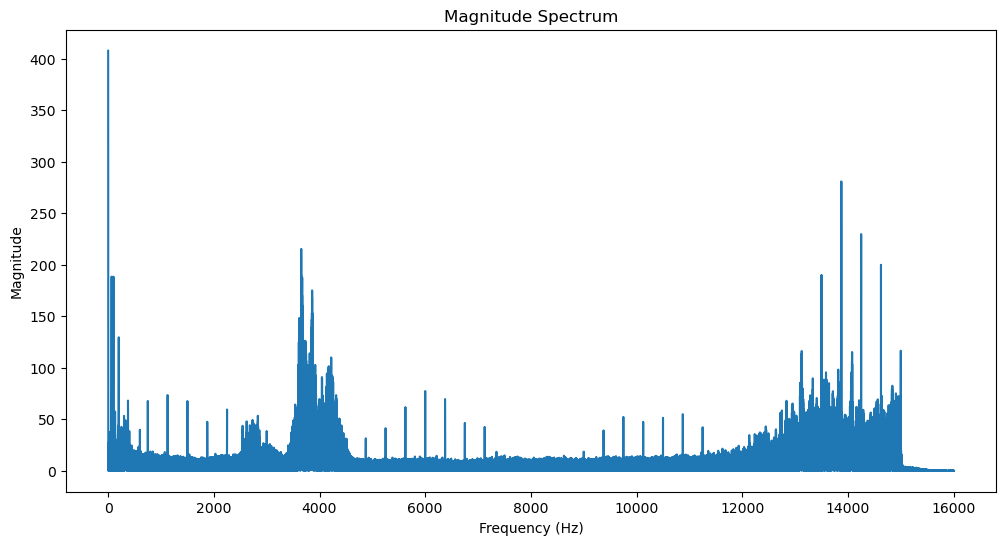

In [17]:
# check if the frequency domain has big difference

## librosa

fft = np.fft.fft(y)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))


half_len = len(magnitude) // 2  
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')


Text(0, 0.5, 'Magnitude')

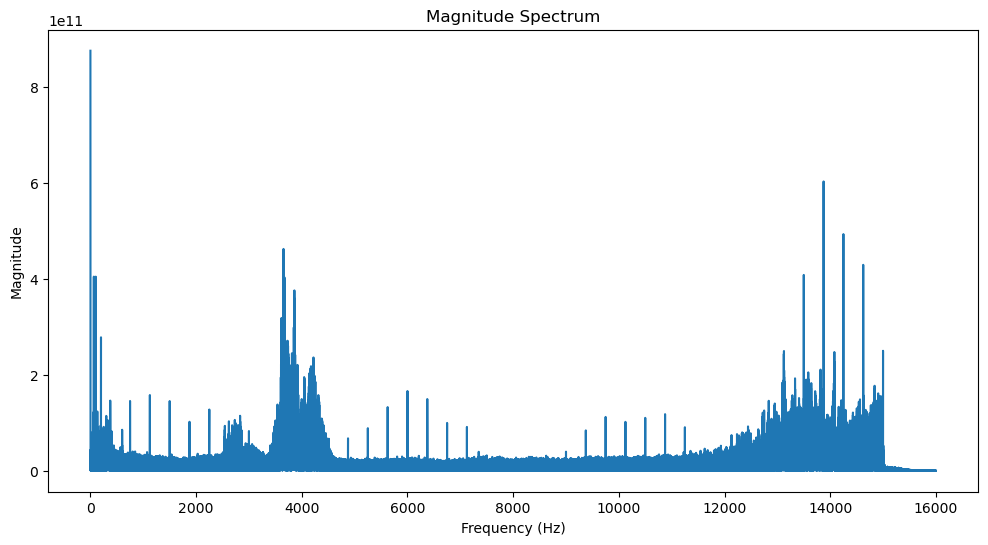

In [19]:
## pydub

fft = np.fft.fft(y2)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr2, len(magnitude))


half_len = len(magnitude) // 2  
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

It is easy to find that even though the scale is different, the distribution is the same.

the following try to adjust the pydub scale, the scale now is too big, I do not want it as input

When using get_array_of_samples() , pydub returns an array of integers corresponding to the bitrate of the audio file. For CD quality audio, this is typically 16 bits, corresponding to values ​​in the range -32768 to 32767.

If you need to know exactly how many bits per sample pydub is using, you can find out by looking at the sample_width attribute of the audio segment. sample_width is in bytes, so you need to multiply it by 8 to get the number of bits. For example:

In [20]:
bit_depth=audio.sample_width * 8

print(bit_depth)

32


If your audio is 32-bit, you need to compress the range of the data read by pydub from [-2^31, 2^31-1] to [-1, 1]. You can normalize the data by dividing by 2^31. This is because the range of audio sample values ​​in 32-bit integer format is between -2^31 and 2^31-1.

In [21]:
audio = AudioSegment.from_file(path, format="ogg")

# convert audio sample to numpy array
samples = np.array(audio.get_array_of_samples())

# Normalize audio samples to the range [-1.0, 1.0]
normalized_samples = samples / float(2**31)

In [23]:
print(normalized_samples)
print(len(normalized_samples))

[-0.00486694 -0.00143428 -0.0066792  ...  0.0002828   0.00395225
 -0.00592587]
7680000


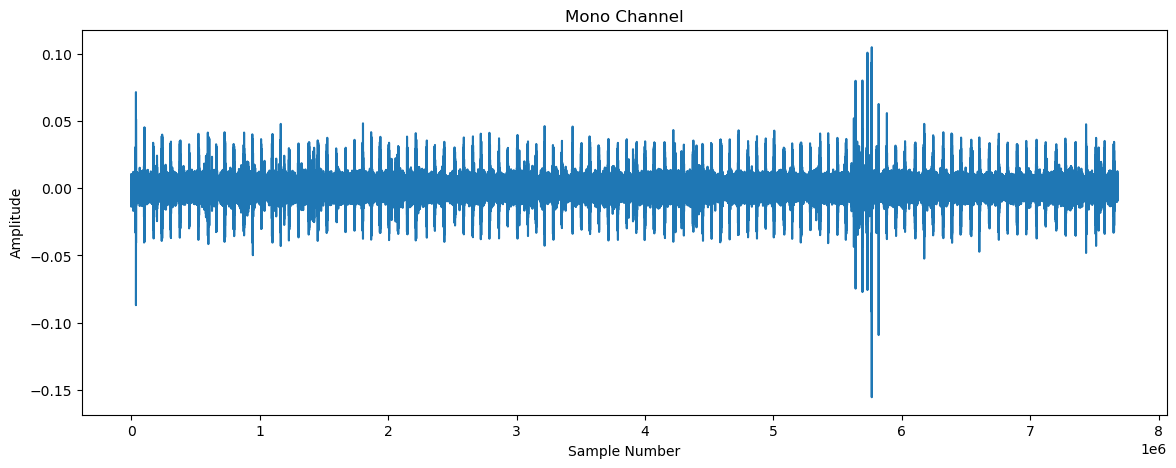

In [24]:
plt.figure(figsize=(14, 5))
plt.plot(normalized_samples)
plt.title('Mono Channel')

plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.show()

Text(0, 0.5, 'Magnitude')

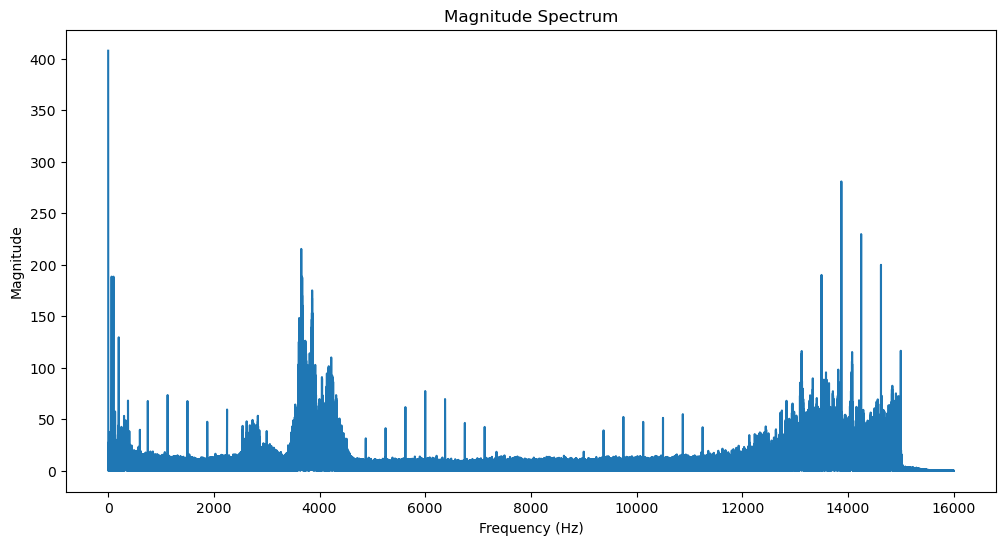

In [25]:
fft = np.fft.fft(normalized_samples)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr2, len(magnitude))


half_len = len(magnitude) // 2 
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

After transformation, both librosa and pydub are the same.